##**1. Download the dataset**

##**2. Load the dataset**

In [1]:
import pandas as pd
data = pd.read_csv("/content/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data['Age'] = data['Rings'] + 1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


##**3. Performing various visualizations**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


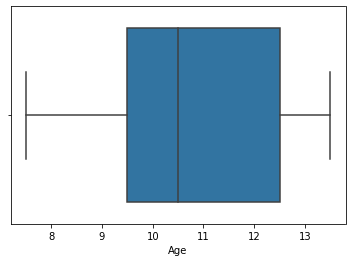

In [45]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


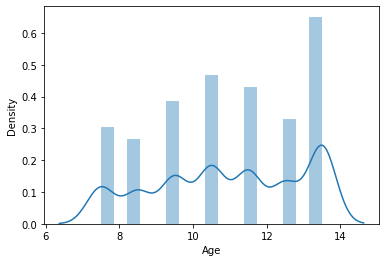

In [46]:
sns.distplot(data['Age'])

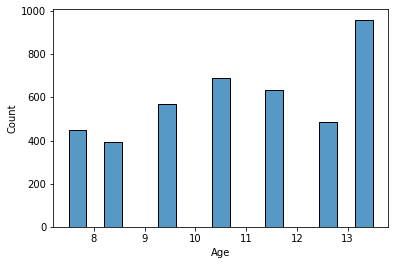

In [47]:
sns.histplot(data['Age'])

##Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


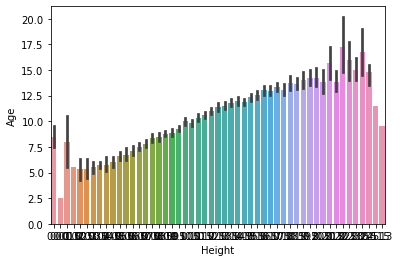

In [11]:
sns.barplot(data['Height'], data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


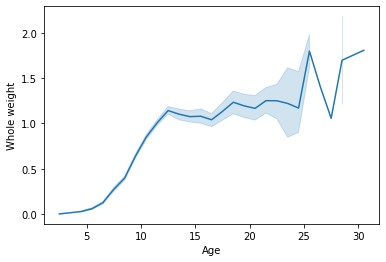

In [13]:
sns.lineplot(data['Age'], data['Whole weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


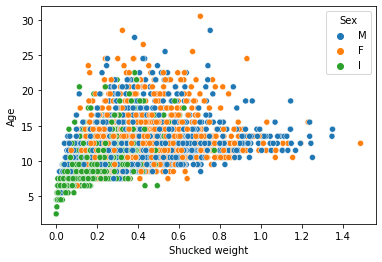

In [20]:
sns.scatterplot(data['Shucked weight'], data['Age'], hue=data['Sex'])

##Multivariate Analysis

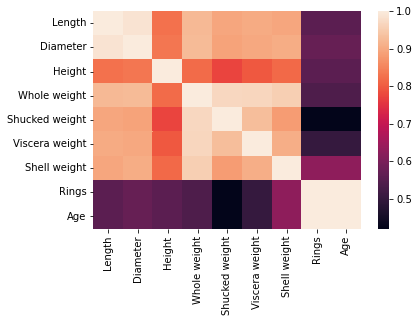

In [25]:
sns.heatmap(data.corr())

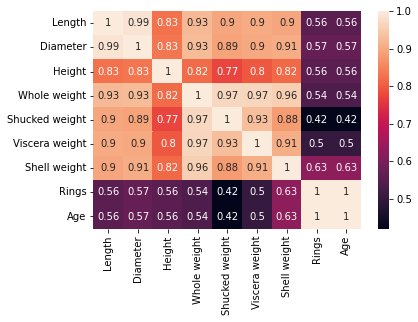

In [23]:
sns.heatmap(data.corr(), annot = True)

##**4. Perform descriptive statistics on the dataset**

In [26]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


##**5. Check for missing values and deal with them**

In [29]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

##**6. Find the outliers and replace the outliers**

In [35]:
print("The Mean of the Age column is ", data['Age'].mean())

The Mean of the Age column is  11.433684462532918


In [34]:
print("The Standard Deviation of the Age column is ", data['Age'].std())

The Standard Deviation of the Age column is  3.2241690320681284


In [40]:
quant = data['Age'].quantile(q=[0.75, 0.5])
inter_quant = quant.iloc[0] - quant.iloc[1]
print("The InterQuartile for Age is",inter_quant)

The InterQuartile for Age is 2.0


In [42]:
lower = quant.iloc[1] - (1.5*inter_quant)
upper = quant.iloc[1] + (1.5*inter_quant)
print("The lower and upper quartile for Age is", lower, "and", upper)

The lower and upper quartile for Age is 7.5 and 13.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


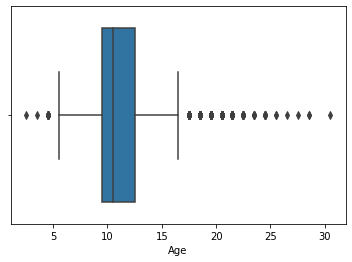

In [30]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


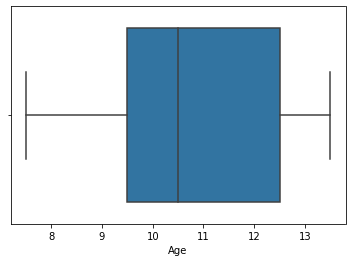

In [44]:
data['Age'] = np.where(data['Age']>upper,upper,np.where(data['Age']<lower,lower,data['Age']))
sns.boxplot(data['Age'])

##**7. Check for Categorical columns and perform encoding**

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lab_en = LabelEncoder()
data['Sex'] = lab_en.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,13.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


##**8. Split the data into dependent and independent variables**

In [55]:
indep = data.iloc[:,0:9]
indep.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [56]:
dep = data.iloc[:,9:]
dep.head()

,Age
0,13.5
1,8.5
2,10.5
3,11.5
4,8.5


##**9. Scale the independent variables**

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
minmax = MinMaxScaler()
indep_scale = minmax.fit_transform(indep)
indep_scale

array([[1.        , 0.51351351, 0.5210084 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [1.        , 0.37162162, 0.35294118, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.        , 0.61486486, 0.61344538, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [1.        , 0.70945946, 0.70588235, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.        , 0.74324324, 0.72268908, ..., 0.34298881, 0.29347285,
        0.32142857],
       [1.        , 0.85810811, 0.84033613, ..., 0.49506254, 0.49177877,
        0.39285714]])

##**10. Split the data into traning and testing**

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(indep_scale, dep, test_size = 0.3, random_state = 1)
x_train

array([[0.        , 0.64864865, 0.61344538, ..., 0.31928901, 0.2077728 ,
        0.42857143],
       [0.5       , 0.64864865, 0.6302521 , ..., 0.17774852, 0.20727454,
        0.25      ],
       [0.5       , 0.66216216, 0.63865546, ..., 0.20737327, 0.25261584,
        0.28571429],
       ...,
       [0.5       , 0.33108108, 0.31092437, ..., 0.03423305, 0.040857  ,
        0.14285714],
       [0.        , 0.60810811, 0.59663866, ..., 0.21395655, 0.17787743,
        0.21428571],
       [0.5       , 0.2972973 , 0.28571429, ..., 0.04147465, 0.03836572,
        0.28571429]])

In [62]:
y_train.head()

,Age
3213,13.5
4080,9.5
1891,10.5
3566,10.5
3438,7.5


In [63]:
y_test.head()

,Age
17,11.5
1131,9.5
299,10.5
1338,11.5
2383,13.5


##**11. Build the model**
##**12. Train the model**

In [64]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

##**13. Test the model**

In [66]:
pred = lin.predict(x_test)
pred

array([[10.60222523],
       [10.20529671],
       [ 9.91079342],
       ...,
       [ 9.78145937],
       [10.12504675],
       [ 7.12219693]])

##**14. Measuring the performance using metrics**

In [73]:
from sklearn import metrics

In [83]:
score = metrics.r2_score(y_test, pred)
print("The R-squared value for the model is", score)

The R-squared value for the model is 0.8234006781080226


In [85]:
score = metrics.mean_absolute_error(y_test, pred)
print("The Mean Absolute error for the model is", score)

The Mean Absolute error for the model is 0.6383905903849102


In [86]:
score = metrics.mean_squared_error(y_test, pred)
print("The Mean Squared error for the model is", score)

The Mean Sqaured error for the model is 0.6859530778081975


In [87]:
score = metrics.explained_variance_score(y_test, pred)
print("The Variance score for the model is", score)

The Variance score for the model is 0.8234850072830793
